In [22]:
import pathlib

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from imutils.object_detection import non_max_suppression
from scipy import signal
from transforms import transforms

IMG_DIR = pathlib.Path("images/")

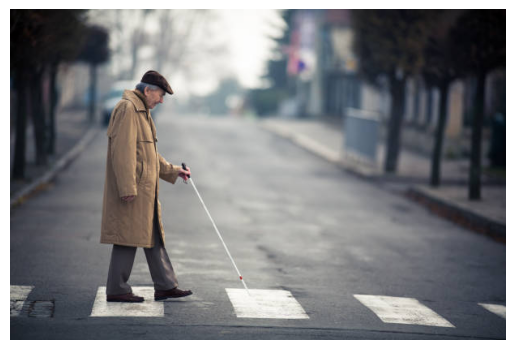

In [23]:
img = cv2.imread(str(IMG_DIR / "old_man.jpg"))
plt.imshow(img[..., ::-1])
plt.axis("off")
plt.show()

In [24]:
hog_descriptor = cv2.HOGDescriptor()
hog_descriptor.setSVMDetector(cv2.HOGDescriptor.getDefaultPeopleDetector())  # type: ignore

rects, w = hog_descriptor.detectMultiScale(img, winStride=(4, 4), padding=(8, 8), scale=1.2)
rects  # [x, y, width, height]

array([[ 72,  36, 191, 372],
       [100,  87,  85, 171]])

In [25]:
rects_nms = rects.copy()  # type: ignore
rects_nms[:, 2:] = rects_nms[:, :2] + rects_nms[:, 2:]  # [x1, y1, x2, y2]
rects_nms

array([[ 72,  36, 263, 408],
       [100,  87, 185, 258]])

In [26]:
rects_nms = non_max_suppression(rects_nms, probs=None, overlapThresh=0.65)
rects_nms

array([[ 72,  36, 263, 408]])

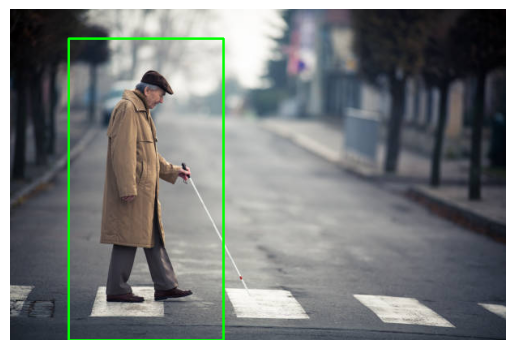

In [27]:
for x1, y1, x2, y2 in rects_nms:
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img[..., ::-1])
plt.axis("off")
plt.show()